In [1]:
from urllib.request import urlretrieve

In [2]:
!pip install pandas --upgrade --quiet


[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd

In [4]:
covid_df = pd.read_csv('Covid_India.csv')

In [5]:
type(covid_df)

pandas.core.frame.DataFrame

In [6]:
covid_df

,date,new_cases,new_deaths,new_tests
0,30-01-2020,1.0,0,NaN
1,31-01-2020,4.0,0,NaN
2,01-02-2020,0.0,0,NaN
3,02-02-2020,NaN,0,NaN
4,03-02-2020,1.0,0,NaN
...,...,...,...,...
1191,05-05-2023,3611.0,36,NaN
1192,06-05-2023,2961.0,17,NaN
1193,07-05-2023,2380.0,21,NaN
1194,08-05-2023,1839.0,12,NaN


In [7]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1196 entries, 0 to 1195
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1196 non-null   object 
 1   new_cases   1193 non-null   float64
 2   new_deaths  1196 non-null   int64  
 3   new_tests   795 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 37.5+ KB


In [8]:
covid_df.describe()

,new_cases,new_deaths,new_tests
count,1193.000000,1196.000000,7.950000e+02
mean,37697.865884,444.571070,1.055093e+06
std,70423.776876,801.097835,1.379855e+06
min,0.000000,0.000000,1.570000e+02
25%,2208.000000,18.000000,4.985255e+05
50%,12729.000000,151.500000,1.014079e+06
75%,40425.000000,497.500000,1.411204e+06
max,414188.000000,6148.000000,3.585563e+07


In [9]:
covid_df.columns

Index(['date', 'new_cases', 'new_deaths', 'new_tests'], dtype='object')

In [10]:
covid_df.shape

(1196, 4)

## Retrieving data from a data frame

The first thing you might want to do is retrieve data from this data frame, e.g., the counts of a specific day or the list of values in a particular column. To do this, it might help to understand the internal representation of data in a data frame. Conceptually, you can think of a dataframe as a dictionary of lists: keys are column names, and values are lists/arrays containing data for the respective columns. 

In [11]:
# Pandas format is simliar to this
covid_data_dict = {
    'date':       ['2020-08-30', '2020-08-31', '2020-09-01', '2020-09-02', '2020-09-03'],
    'new_cases':  [1444, 1365, 996, 975, 1326],
    'new_deaths': [1, 4, 6, 8, 6],
    'new_tests': [53541, 42583, 54395, None, None]
}

In [12]:
# Pandas format is not similar to this
covid_data_list = [
    {'date': '2020-08-30', 'new_cases': 1444, 'new_deaths': 1, 'new_tests': 53541},
    {'date': '2020-08-31', 'new_cases': 1365, 'new_deaths': 4, 'new_tests': 42583},
    {'date': '2020-09-01', 'new_cases': 996, 'new_deaths': 6, 'new_tests': 54395},
    {'date': '2020-09-02', 'new_cases': 975, 'new_deaths': 8 },
    {'date': '2020-09-03', 'new_cases': 1326, 'new_deaths': 6},
]

In [13]:
covid_data_dict['new_cases']

[1444, 1365, 996, 975, 1326]

In [14]:
covid_df['new_cases']

0          1.0
1          4.0
2          0.0
3          NaN
4          1.0
         ...  
1191    3611.0
1192    2961.0
1193    2380.0
1194    1839.0
1195    1331.0
Name: new_cases, Length: 1196, dtype: float64

In [15]:
type(covid_df['new_cases'])

pandas.core.series.Series

In [16]:
covid_df['new_cases'][246]

81484.0

In [17]:
covid_df['new_tests'][240]

1341535.0

In [18]:
covid_df.at[246, 'new_cases']

81484.0

In [19]:
covid_df.at[240, 'new_tests']

1341535.0

In [20]:
covid_df.new_cases

0          1.0
1          4.0
2          0.0
3          NaN
4          1.0
         ...  
1191    3611.0
1192    2961.0
1193    2380.0
1194    1839.0
1195    1331.0
Name: new_cases, Length: 1196, dtype: float64

In [21]:
cases_df = covid_df[['date', 'new_cases']]
cases_df

,date,new_cases
0,30-01-2020,1.0
1,31-01-2020,4.0
2,01-02-2020,0.0
3,02-02-2020,NaN
4,03-02-2020,1.0
...,...,...
1191,05-05-2023,3611.0
1192,06-05-2023,2961.0
1193,07-05-2023,2380.0
1194,08-05-2023,1839.0


In [22]:
covid_df_copy = covid_df.copy()

In [23]:
covid_df

,date,new_cases,new_deaths,new_tests
0,30-01-2020,1.0,0,NaN
1,31-01-2020,4.0,0,NaN
2,01-02-2020,0.0,0,NaN
3,02-02-2020,NaN,0,NaN
4,03-02-2020,1.0,0,NaN
...,...,...,...,...
1191,05-05-2023,3611.0,36,NaN
1192,06-05-2023,2961.0,17,NaN
1193,07-05-2023,2380.0,21,NaN
1194,08-05-2023,1839.0,12,NaN


In [24]:
covid_df.loc[243]

date          29-09-2020
new_cases        70589.0
new_deaths           776
new_tests      1142811.0
Name: 243, dtype: object

Each retrieved row is also a `Series` object.

In [25]:
type(covid_df.loc[243])

pandas.core.series.Series

In [26]:
covid_df.head(5)

,date,new_cases,new_deaths,new_tests
0,30-01-2020,1.0,0,NaN
1,31-01-2020,4.0,0,NaN
2,01-02-2020,0.0,0,NaN
3,02-02-2020,NaN,0,NaN
4,03-02-2020,1.0,0,NaN


In [27]:
covid_df.tail(4)

,date,new_cases,new_deaths,new_tests
1192,06-05-2023,2961.0,17,NaN
1193,07-05-2023,2380.0,21,NaN
1194,08-05-2023,1839.0,12,NaN
1195,09-05-2023,1331.0,15,NaN


In [28]:
covid_df.at[0, 'new_tests']

nan

In [29]:
type(covid_df.at[0, 'new_tests'])

numpy.float64

In [30]:
covid_df.new_tests.first_valid_index()

49

In [31]:
covid_df.loc[108:113]

,date,new_cases,new_deaths,new_tests
108,17-05-2020,4987.0,120,93365.0
109,18-05-2020,5242.0,157,75150.0
110,19-05-2020,4970.0,134,101475.0
111,20-05-2020,5611.0,140,108121.0
112,21-05-2020,5609.0,132,103532.0
113,22-05-2020,6088.0,148,103514.0


In [32]:
covid_df.sample(10)

,date,new_cases,new_deaths,new_tests
922,09-08-2022,12751.0,42,NaN
20,19-02-2020,0.0,0,NaN
908,26-07-2022,14830.0,36,NaN
296,21-11-2020,46232.0,564,1066022.0
337,01-01-2021,20035.0,256,1062420.0
792,01-04-2022,1335.0,52,606036.0
605,26-09-2021,28326.0,260,1581862.0
892,10-07-2022,18257.0,42,NaN
149,27-06-2020,18552.0,384,220479.0
206,23-08-2020,69239.0,912,801147.0


## Analyzing data from data frames

Let's try to answer some questions about our data.

**Q: What are the total number of reported cases and deaths related to Covid-19 in India?**



In [33]:
total_cases = covid_df.new_cases.sum()
total_deaths = covid_df.new_deaths.sum()

In [34]:
print('The number of reported cases is {} and the number of reported deaths is {}.'.format(int(total_cases), int(total_deaths)))

The number of reported cases is 44973554 and the number of reported deaths is 531707.


**Q: What is the overall death rate (ratio of reported deaths to reported cases)?**

In [35]:
death_rate = covid_df.new_deaths.sum() / covid_df.new_cases.sum()

In [36]:
print("The overall reported death rate in India is {:.2f} %.".format(death_rate*100))

The overall reported death rate in India is 1.18 %.


**Q: What is the overall number of tests conducted? A total of 935310 tests were conducted before daily test numbers were reported.**


In [37]:
initial_tests = 935310
total_tests = initial_tests + covid_df.new_tests.sum()

In [38]:
total_tests

839733948.0

**Q: What fraction of tests returned a positive result?**

In [39]:
positive_rate = total_cases / total_tests

In [40]:
print('{:.2f}% of tests in India led to a positive diagnosis.'.format(positive_rate*100))

5.36% of tests in India led to a positive diagnosis.


## Querying and sorting rows

Let's say we want only want to look at the days which had more than 1000 reported cases. We can use a boolean expression to check which rows satisfy this criterion.

In [41]:
high_new_cases = covid_df.new_cases > 1000

In [42]:
high_new_cases

0       False
1       False
2       False
3       False
4       False
        ...  
1191     True
1192     True
1193     True
1194     True
1195     True
Name: new_cases, Length: 1196, dtype: bool

In [43]:
covid_df[high_new_cases]

,date,new_cases,new_deaths,new_tests
72,11-04-2020,1035.0,40,18044.0
75,14-04-2020,1211.0,31,27339.0
76,15-04-2020,1076.0,38,29706.0
78,17-04-2020,1007.0,23,32167.0
80,19-04-2020,1334.0,27,29463.0
...,...,...,...,...
1191,05-05-2023,3611.0,36,NaN
1192,06-05-2023,2961.0,17,NaN
1193,07-05-2023,2380.0,21,NaN
1194,08-05-2023,1839.0,12,NaN


In [44]:
high_cases_df = covid_df[covid_df.new_cases > 1000]

In [45]:
high_cases_df

,date,new_cases,new_deaths,new_tests
72,11-04-2020,1035.0,40,18044.0
75,14-04-2020,1211.0,31,27339.0
76,15-04-2020,1076.0,38,29706.0
78,17-04-2020,1007.0,23,32167.0
80,19-04-2020,1334.0,27,29463.0
...,...,...,...,...
1191,05-05-2023,3611.0,36,NaN
1192,06-05-2023,2961.0,17,NaN
1193,07-05-2023,2380.0,21,NaN
1194,08-05-2023,1839.0,12,NaN


In [46]:
from IPython.display import display
with pd.option_context('display.max_rows', 100):
    display(covid_df[covid_df.new_cases > 1000])

,date,new_cases,new_deaths,new_tests
72,11-04-2020,1035.0,40,18044.0
75,14-04-2020,1211.0,31,27339.0
76,15-04-2020,1076.0,38,29706.0
78,17-04-2020,1007.0,23,32167.0
80,19-04-2020,1334.0,27,29463.0
...,...,...,...,...
1191,05-05-2023,3611.0,36,NaN
1192,06-05-2023,2961.0,17,NaN
1193,07-05-2023,2380.0,21,NaN
1194,08-05-2023,1839.0,12,NaN


In [47]:
positive_rate

0.053556908241132586

In [48]:
high_ratio_df = covid_df[covid_df.new_cases / covid_df.new_tests > positive_rate]

In [49]:
high_ratio_df

,date,new_cases,new_deaths,new_tests
49,19-03-2020,22.0,1,191.0
52,22-03-2020,77.0,3,1298.0
54,24-03-2020,85.0,0,157.0
65,04-04-2020,601.0,12,10705.0
67,06-04-2020,693.0,32,11534.0
...,...,...,...,...
734,02-02-2022,161386.0,1733,1742793.0
735,03-02-2022,172433.0,1008,1752628.0
736,04-02-2022,149394.0,1072,1611666.0
737,05-02-2022,127952.0,1059,2127953.0


In [50]:
covid_df.new_cases / covid_df.new_tests

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
1191   NaN
1192   NaN
1193   NaN
1194   NaN
1195   NaN
Length: 1196, dtype: float64

In [51]:
covid_df['positive_rate'] = covid_df.new_cases / covid_df.new_tests

In [52]:
covid_df

,date,new_cases,new_deaths,new_tests,positive_rate
0,30-01-2020,1.0,0,NaN,NaN
1,31-01-2020,4.0,0,NaN,NaN
2,01-02-2020,0.0,0,NaN,NaN
3,02-02-2020,NaN,0,NaN,NaN
4,03-02-2020,1.0,0,NaN,NaN
...,...,...,...,...,...
1191,05-05-2023,3611.0,36,NaN,NaN
1192,06-05-2023,2961.0,17,NaN,NaN
1193,07-05-2023,2380.0,21,NaN,NaN
1194,08-05-2023,1839.0,12,NaN,NaN


In [53]:
covid_df.drop(columns=['positive_rate'], inplace=True)

In [54]:
covid_df.sort_values('new_cases', ascending=False).head(10)

,date,new_cases,new_deaths,new_tests
463,07-05-2021,414188.0,3915,1826490.0
462,06-05-2021,412262.0,3980,1923131.0
465,09-05-2021,403738.0,4092,1865428.0
457,01-05-2021,401993.0,3523,1945299.0
464,08-05-2021,401078.0,4187,1808344.0
458,02-05-2021,392488.0,3689,1804954.0
456,30-04-2021,386452.0,3498,1920107.0
461,05-05-2021,382315.0,3780,1541299.0
455,29-04-2021,379257.0,3645,1768190.0
459,03-05-2021,368147.0,3417,1504698.0


In [55]:
covid_df.sort_values('new_deaths', ascending=False).head(10)

,date,new_cases,new_deaths,new_tests
497,10-06-2021,94052.0,6148,2004690.0
475,19-05-2021,267334.0,4529,2008296.0
480,24-05-2021,222315.0,4454,1928127.0
474,18-05-2021,263533.0,4329,1869223.0
477,21-05-2021,259551.0,4209,2061683.0
468,12-05-2021,348421.0,4205,1983804.0
478,22-05-2021,257299.0,4194,2066285.0
464,08-05-2021,401078.0,4187,1808344.0
482,26-05-2021,208921.0,4157,2217320.0
469,13-05-2021,362727.0,4120,1864594.0


In [56]:
covid_df.sort_values('new_cases').head(10)

,date,new_cases,new_deaths,new_tests
15,14-02-2020,0.0,0,NaN
28,27-02-2020,0.0,0,NaN
27,26-02-2020,0.0,0,NaN
26,25-02-2020,0.0,0,NaN
25,24-02-2020,0.0,0,NaN
24,23-02-2020,0.0,0,NaN
23,22-02-2020,0.0,0,NaN
22,21-02-2020,0.0,0,NaN
21,20-02-2020,0.0,0,NaN
20,19-02-2020,0.0,0,NaN


In [57]:
covid_df.loc[169:175]

,date,new_cases,new_deaths,new_tests
169,17-07-2020,34956.0,687,333228.0
170,18-07-2020,34884.0,671,361024.0
171,19-07-2020,38902.0,543,358127.0
172,20-07-2020,40425.0,681,256039.0
173,21-07-2020,37148.0,587,333395.0
174,22-07-2020,37724.0,648,343243.0
175,23-07-2020,45720.0,1129,350823.0


In [58]:
covid_df.date

0       30-01-2020
1       31-01-2020
2       01-02-2020
3       02-02-2020
4       03-02-2020
           ...    
1191    05-05-2023
1192    06-05-2023
1193    07-05-2023
1194    08-05-2023
1195    09-05-2023
Name: date, Length: 1196, dtype: object

In [59]:
covid_df['date'] = pd.to_datetime(covid_df.date)

C:\Users\mrgau\AppData\Local\Temp\ipykernel_6384\928678298.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  covid_df['date'] = pd.to_datetime(covid_df.date)


In [60]:
covid_df['date']

0      2020-01-30
1      2020-01-31
2      2020-02-01
3      2020-02-02
4      2020-02-03
          ...    
1191   2023-05-05
1192   2023-05-06
1193   2023-05-07
1194   2023-05-08
1195   2023-05-09
Name: date, Length: 1196, dtype: datetime64[ns]

In [61]:
covid_df['year'] = pd.DatetimeIndex(covid_df.date).year
covid_df['month'] = pd.DatetimeIndex(covid_df.date).month
covid_df['day'] = pd.DatetimeIndex(covid_df.date).day
covid_df['weekday'] = pd.DatetimeIndex(covid_df.date).weekday

In [62]:
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday
0,2020-01-30,1.0,0,NaN,2020,1,30,3
1,2020-01-31,4.0,0,NaN,2020,1,31,4
2,2020-02-01,0.0,0,NaN,2020,2,1,5
3,2020-02-02,NaN,0,NaN,2020,2,2,6
4,2020-02-03,1.0,0,NaN,2020,2,3,0
...,...,...,...,...,...,...,...,...
1191,2023-05-05,3611.0,36,NaN,2023,5,5,4
1192,2023-05-06,2961.0,17,NaN,2023,5,6,5
1193,2023-05-07,2380.0,21,NaN,2023,5,7,6
1194,2023-05-08,1839.0,12,NaN,2023,5,8,0


In [63]:
# Query the rows for May
covid_df_may = covid_df[covid_df.month == 5]

# Extract the subset of columns to be aggregated
covid_df_may_metrics = covid_df_may[['new_cases', 'new_deaths', 'new_tests']]

# Get the column-wise sum
covid_may_totals = covid_df_may_metrics.sum()

In [64]:
covid_may_totals

new_cases      9543285.0
new_deaths      125861.0
new_tests     70272029.0
dtype: float64

In [65]:
type(covid_may_totals)

pandas.core.series.Series

We can also combine the above operations into a single statement.

In [66]:
covid_df[covid_df.month == 5][['new_cases', 'new_deaths', 'new_tests']].sum()

new_cases      9543285.0
new_deaths      125861.0
new_tests     70272029.0
dtype: float64

In [67]:
# Overall average
covid_df.new_cases.mean()

37697.86588432523

In [68]:
# Average for Sundays
covid_df[covid_df.weekday == 6].new_cases.mean()

39022.82941176471

In [69]:
covid_month_df = covid_df.groupby('month')[['new_cases', 'new_deaths', 'new_tests']].sum()

In [70]:
covid_month_df

,new_cases,new_deaths,new_tests
month,,,
1,6947550.0,19544,71833952.0
2,1975830.0,21601,55960118.0
3,1183575.0,12831,45836883.0
4,6926467.0,50244,90775423.0
5,9543285.0,125861,70272029.0
6,2994088.0,81569,78189850.0
7,2890822.0,45451,66551310.0
8,3545844.0,44989,78589004.0
9,3734532.0,43285,75953381.0


In [71]:
covid_month_mean_df = covid_df.groupby('month')[['new_cases', 'new_deaths', 'new_tests']].mean()

In [72]:
covid_month_mean_df

,new_cases,new_deaths,new_tests
month,,,
1,73132.105263,205.726316,1.197233e+06
2,17641.339286,191.159292,1.036298e+06
3,9622.560976,103.475806,7.051828e+05
4,57720.558333,418.700000,1.107017e+06
5,93561.617647,1233.931373,7.895734e+05
6,33267.644444,906.322222,9.653068e+05
7,31084.107527,488.720430,1.073408e+06
8,38127.354839,483.752688,1.267565e+06
9,41494.800000,480.944444,1.309541e+06


In [73]:
covid_df['total_cases'] = covid_df.new_cases.cumsum()

In [74]:
covid_df['total_deaths'] = covid_df.new_deaths.cumsum()

In [75]:
covid_df['total_tests'] = covid_df.new_tests.cumsum() + initial_tests

In [76]:
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests
0,2020-01-30,1.0,0,NaN,2020,1,30,3,1.0,0,NaN
1,2020-01-31,4.0,0,NaN,2020,1,31,4,5.0,0,NaN
2,2020-02-01,0.0,0,NaN,2020,2,1,5,5.0,0,NaN
3,2020-02-02,NaN,0,NaN,2020,2,2,6,NaN,0,NaN
4,2020-02-03,1.0,0,NaN,2020,2,3,0,6.0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1191,2023-05-05,3611.0,36,NaN,2023,5,5,4,44965043.0,531642,NaN
1192,2023-05-06,2961.0,17,NaN,2023,5,6,5,44968004.0,531659,NaN
1193,2023-05-07,2380.0,21,NaN,2023,5,7,6,44970384.0,531680,NaN
1194,2023-05-08,1839.0,12,NaN,2023,5,8,0,44972223.0,531692,NaN


In [77]:
urlretrieve('https://gist.githubusercontent.com/aakashns/8684589ef4f266116cdce023377fc9c8/raw/99ce3826b2a9d1e6d0bde7e9e559fc8b6e9ac88b/locations.csv', 
            'locations.csv')

('locations.csv', <http.client.HTTPMessage at 0x298674217d0>)

In [78]:
locations_df = pd.read_csv('locations.csv')

In [79]:
locations_df

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,Afghanistan,Asia,3.892834e+07,64.83,0.500,1803.987
1,Albania,Europe,2.877800e+06,78.57,2.890,11803.431
2,Algeria,Africa,4.385104e+07,76.88,1.900,13913.839
3,Andorra,Europe,7.726500e+04,83.73,NaN,NaN
4,Angola,Africa,3.286627e+07,61.15,NaN,5819.495
...,...,...,...,...,...,...
207,Yemen,Asia,2.982597e+07,66.12,0.700,1479.147
208,Zambia,Africa,1.838396e+07,63.89,2.000,3689.251
209,Zimbabwe,Africa,1.486293e+07,61.49,1.700,1899.775
210,World,NaN,7.794799e+09,72.58,2.705,15469.207


In [80]:
locations_df[locations_df.location == "India"]

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
90,India,Asia,1.380004e+09,69.66,0.53,6426.674


In [81]:
covid_df['location'] = "India"

In [82]:
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests,location
0,2020-01-30,1.0,0,NaN,2020,1,30,3,1.0,0,NaN,India
1,2020-01-31,4.0,0,NaN,2020,1,31,4,5.0,0,NaN,India
2,2020-02-01,0.0,0,NaN,2020,2,1,5,5.0,0,NaN,India
3,2020-02-02,NaN,0,NaN,2020,2,2,6,NaN,0,NaN,India
4,2020-02-03,1.0,0,NaN,2020,2,3,0,6.0,0,NaN,India
...,...,...,...,...,...,...,...,...,...,...,...,...
1191,2023-05-05,3611.0,36,NaN,2023,5,5,4,44965043.0,531642,NaN,India
1192,2023-05-06,2961.0,17,NaN,2023,5,6,5,44968004.0,531659,NaN,India
1193,2023-05-07,2380.0,21,NaN,2023,5,7,6,44970384.0,531680,NaN,India
1194,2023-05-08,1839.0,12,NaN,2023,5,8,0,44972223.0,531692,NaN,India


In [83]:
merged_df = covid_df.merge(locations_df, on="location")

In [84]:
merged_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,2020-01-30,1.0,0,NaN,2020,1,30,3,1.0,0,NaN,India,Asia,1.380004e+09,69.66,0.53,6426.674
1,2020-01-31,4.0,0,NaN,2020,1,31,4,5.0,0,NaN,India,Asia,1.380004e+09,69.66,0.53,6426.674
2,2020-02-01,0.0,0,NaN,2020,2,1,5,5.0,0,NaN,India,Asia,1.380004e+09,69.66,0.53,6426.674
3,2020-02-02,NaN,0,NaN,2020,2,2,6,NaN,0,NaN,India,Asia,1.380004e+09,69.66,0.53,6426.674
4,2020-02-03,1.0,0,NaN,2020,2,3,0,6.0,0,NaN,India,Asia,1.380004e+09,69.66,0.53,6426.674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1191,2023-05-05,3611.0,36,NaN,2023,5,5,4,44965043.0,531642,NaN,India,Asia,1.380004e+09,69.66,0.53,6426.674
1192,2023-05-06,2961.0,17,NaN,2023,5,6,5,44968004.0,531659,NaN,India,Asia,1.380004e+09,69.66,0.53,6426.674
1193,2023-05-07,2380.0,21,NaN,2023,5,7,6,44970384.0,531680,NaN,India,Asia,1.380004e+09,69.66,0.53,6426.674
1194,2023-05-08,1839.0,12,NaN,2023,5,8,0,44972223.0,531692,NaN,India,Asia,1.380004e+09,69.66,0.53,6426.674


In [85]:
merged_df['cases_per_million'] = merged_df.total_cases * 1e6 / merged_df.population

In [86]:
merged_df['deaths_per_million'] = merged_df.total_deaths * 1e6 / merged_df.population

In [87]:
merged_df['tests_per_million'] = merged_df.total_tests * 1e6 / merged_df.population

In [88]:
merged_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita,cases_per_million,deaths_per_million,tests_per_million
0,2020-01-30,1.0,0,NaN,2020,1,30,3,1.0,0,NaN,India,Asia,1.380004e+09,69.66,0.53,6426.674,0.000725,0.000000,NaN
1,2020-01-31,4.0,0,NaN,2020,1,31,4,5.0,0,NaN,India,Asia,1.380004e+09,69.66,0.53,6426.674,0.003623,0.000000,NaN
2,2020-02-01,0.0,0,NaN,2020,2,1,5,5.0,0,NaN,India,Asia,1.380004e+09,69.66,0.53,6426.674,0.003623,0.000000,NaN
3,2020-02-02,NaN,0,NaN,2020,2,2,6,NaN,0,NaN,India,Asia,1.380004e+09,69.66,0.53,6426.674,NaN,0.000000,NaN
4,2020-02-03,1.0,0,NaN,2020,2,3,0,6.0,0,NaN,India,Asia,1.380004e+09,69.66,0.53,6426.674,0.004348,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1191,2023-05-05,3611.0,36,NaN,2023,5,5,4,44965043.0,531642,NaN,India,Asia,1.380004e+09,69.66,0.53,6426.674,32583.260958,385.246602,NaN
1192,2023-05-06,2961.0,17,NaN,2023,5,6,5,44968004.0,531659,NaN,India,Asia,1.380004e+09,69.66,0.53,6426.674,32585.406604,385.258921,NaN
1193,2023-05-07,2380.0,21,NaN,2023,5,7,6,44970384.0,531680,NaN,India,Asia,1.380004e+09,69.66,0.53,6426.674,32587.131236,385.274138,NaN
1194,2023-05-08,1839.0,12,NaN,2023,5,8,0,44972223.0,531692,NaN,India,Asia,1.380004e+09,69.66,0.53,6426.674,32588.463840,385.282834,NaN


In [89]:
result_df = merged_df[['date',
                       'new_cases', 
                       'total_cases', 
                       'new_deaths', 
                       'total_deaths', 
                       'new_tests', 
                       'total_tests', 
                       'cases_per_million', 
                       'deaths_per_million', 
                       'tests_per_million']]

In [90]:
result_df

,date,new_cases,total_cases,new_deaths,total_deaths,new_tests,total_tests,cases_per_million,deaths_per_million,tests_per_million
0,2020-01-30,1.0,1.0,0,0,NaN,NaN,0.000725,0.000000,NaN
1,2020-01-31,4.0,5.0,0,0,NaN,NaN,0.003623,0.000000,NaN
2,2020-02-01,0.0,5.0,0,0,NaN,NaN,0.003623,0.000000,NaN
3,2020-02-02,NaN,NaN,0,0,NaN,NaN,NaN,0.000000,NaN
4,2020-02-03,1.0,6.0,0,0,NaN,NaN,0.004348,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...
1191,2023-05-05,3611.0,44965043.0,36,531642,NaN,NaN,32583.260958,385.246602,NaN
1192,2023-05-06,2961.0,44968004.0,17,531659,NaN,NaN,32585.406604,385.258921,NaN
1193,2023-05-07,2380.0,44970384.0,21,531680,NaN,NaN,32587.131236,385.274138,NaN
1194,2023-05-08,1839.0,44972223.0,12,531692,NaN,NaN,32588.463840,385.282834,NaN


In [91]:
result_df.to_csv('results.csv', index=None)

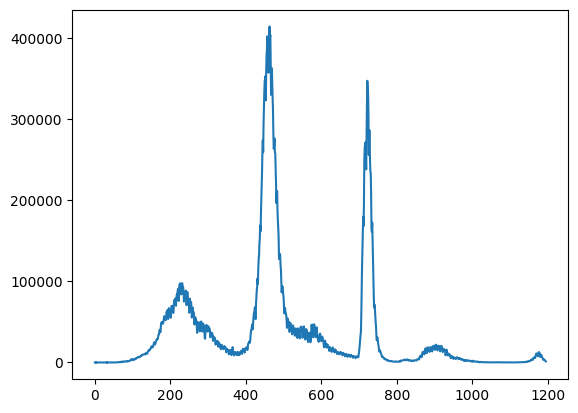

In [92]:
result_df.new_cases.plot();

In [93]:
result_df.set_index('date', inplace=True)

In [94]:
result_df.style.background_gradient(cmap='Reds')

In [95]:
result_df.loc['2020-09-01']

new_cases             6.992100e+04
total_cases           3.691171e+06
new_deaths            8.190000e+02
total_deaths          6.528800e+04
new_tests             1.016920e+06
total_tests           4.412526e+07
cases_per_million     2.674753e+03
deaths_per_million    4.730999e+01
tests_per_million     3.197472e+04
Name: 2020-09-01 00:00:00, dtype: float64

Let's plot the new cases & new deaths per day as line graphs.

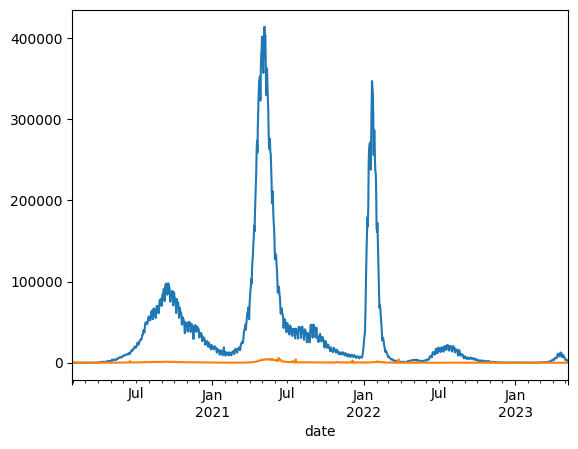

In [96]:
result_df.new_cases.plot()
result_df.new_deaths.plot();

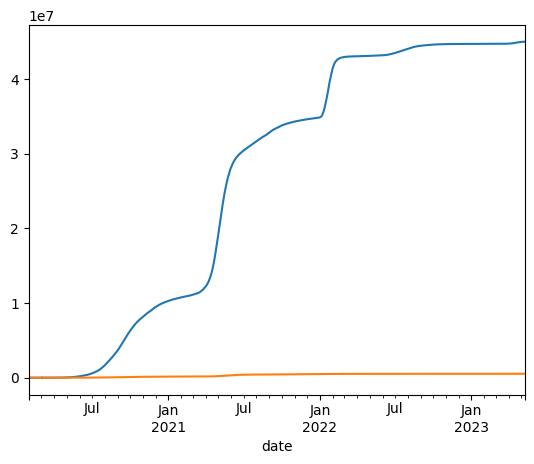

In [97]:
result_df.total_cases.plot()
result_df.total_deaths.plot();

Let's see how the death rate and positive testing rates vary over time.

In [98]:
death_rate = result_df.total_deaths / result_df.total_cases

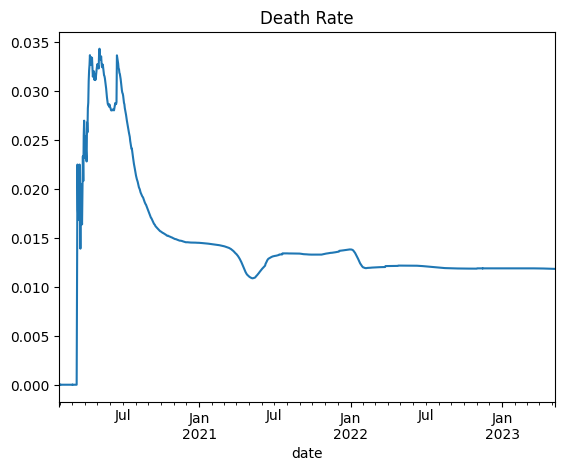

In [99]:
death_rate.plot(title='Death Rate');

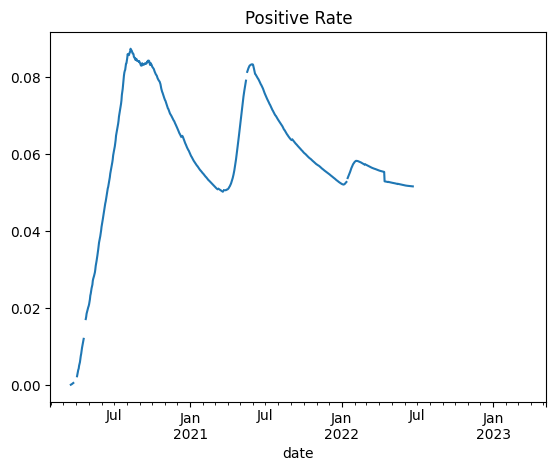

In [100]:
positive_rates = result_df.total_cases / result_df.total_tests
positive_rates.plot(title='Positive Rate');

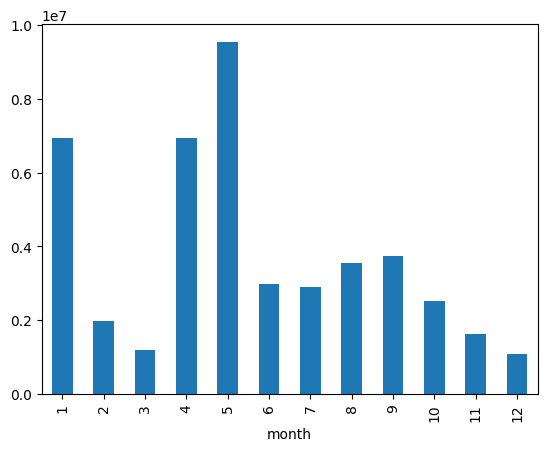

In [101]:
covid_month_df.new_cases.plot(kind='bar');

<Axes: xlabel='month'>

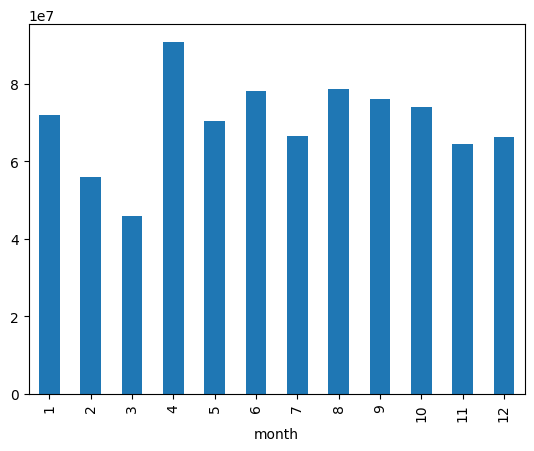

In [102]:
covid_month_df.new_tests.plot(kind='bar')

In [103]:
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests,location
0,2020-01-30,1.0,0,NaN,2020,1,30,3,1.0,0,NaN,India
1,2020-01-31,4.0,0,NaN,2020,1,31,4,5.0,0,NaN,India
2,2020-02-01,0.0,0,NaN,2020,2,1,5,5.0,0,NaN,India
3,2020-02-02,NaN,0,NaN,2020,2,2,6,NaN,0,NaN,India
4,2020-02-03,1.0,0,NaN,2020,2,3,0,6.0,0,NaN,India
...,...,...,...,...,...,...,...,...,...,...,...,...
1191,2023-05-05,3611.0,36,NaN,2023,5,5,4,44965043.0,531642,NaN,India
1192,2023-05-06,2961.0,17,NaN,2023,5,6,5,44968004.0,531659,NaN,India
1193,2023-05-07,2380.0,21,NaN,2023,5,7,6,44970384.0,531680,NaN,India
1194,2023-05-08,1839.0,12,NaN,2023,5,8,0,44972223.0,531692,NaN,India


In [104]:
covid_df.style.background_gradient(cmap='twilight_shifted')

In [126]:
covid_df.new_tests.max()

35855632.0